In [4]:
import pandas as pd
from nltk.corpus import wordnet as wn
import numpy as np

In [37]:
vec_length = 600
epochs = 10

# vecs_df = pd.read_csv("/var/tmp/vectors/1b%sd_vectors_e%s_sample1e4_nonbin" % (vec_length, epochs), 
#                       skiprows=[0], header=None, sep=" ")

vecs_df = pd.read_csv("/var/tmp/xstefan3/vectors/1b600d_vectors_e10_sample1e4_nonbin", 
                      skiprows=[0], header=None, sep=" ")

vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('bool')
vecs_df.head(20)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
</s>,True,True,False,False,False,True,True,False,False,True,...,True,False,False,False,True,True,False,False,False,False
the,False,False,True,True,False,False,True,False,True,True,...,False,True,True,True,False,True,True,True,False,True
of,False,False,True,False,True,False,False,False,False,False,...,False,True,False,True,True,True,False,True,True,True
and,False,False,True,True,False,True,True,False,False,False,...,False,True,True,True,False,False,True,True,False,True
one,False,False,False,True,False,False,True,False,True,False,...,True,True,False,False,True,False,False,True,False,True
in,False,True,True,True,True,False,True,False,True,False,...,True,True,False,True,True,False,False,True,True,True
a,False,False,False,False,True,False,True,False,True,False,...,False,True,False,False,True,False,False,True,True,True
to,True,False,False,True,False,False,False,False,True,True,...,False,False,True,False,False,True,False,True,True,True
zero,False,False,False,True,False,False,False,False,True,True,...,True,False,False,True,True,False,False,True,False,False


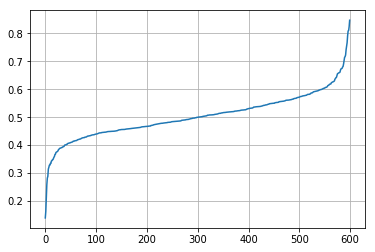

In [41]:
vecs_df.mean(axis=0).sort_values().reset_index()[0].plot(grid=True)

# Implications collection

For each pair of features (x, y), compute a ratio of the pairs of bits (x_i, y_i), where x_i => y_i.

Do this for each mapping in {x<>y, inverse(x)<>y, x<>inverse(y), inverse(x)<>inverse(y)} and select a mapping of x from (x, inverse(x)) so, that a maximum sum of implication probability with other bits is reached.

In [257]:
def feature_dist(x, y):
    pos_pairs = sum((x == y) | y)
    all_pairs = len(y)
    return float(pos_pairs) / all_pairs

In [258]:
def all_combs_dist(x, y):
    return [feature_dist(x, y), feature_dist(~x, y), feature_dist(x, ~y), feature_dist(~x, ~y)]

In [332]:
no_words = int(1e4)
no_features = int(1e2)

widx = np.random.choice(np.arange(len(vecs_df.index)), no_words, replace=False)
fidx = np.random.choice(np.arange(len(vecs_df.columns)), no_features, replace=False)

dists = vecs_df[fidx].iloc[widx].apply(lambda col1: vecs_df[fidx].iloc[widx]
                                       .apply(lambda col2: all_combs_dist(col1, col2), axis=0), axis=0)

In [260]:
# no_words = int(1e2)
# no_features = int(1e2)

# widx = np.random.choice(np.arange(len(vecs_df.index)), no_words)
# fidx = np.random.choice(np.arange(len(vecs_df.columns)), no_features)

# dists = vecs_df.iloc[widx, fidx].apply(lambda col1: vecs_df.iloc[widx, fidx]
#                                        .apply(lambda col2: all_combs_dist(col1, col2), axis=0), axis=0)

In [255]:
def all_combs_for_one(x_i):
    print(x_i)
    return vecs_df.iloc[widx, x_i].apply(lambda col1: vecs_df.iloc[widx, fidx]
                                        .apply(lambda col2: all_combs_dist(col1, col2), axis=0)), x_i

In [ ]:
import multiprocessing as mp
from tqdm import tqdm_notebook

pool = mp.Pool(mp.cpu_count())

dists_pool = dict()
for dists_i, x_i in tqdm_notebook(pool.imap_unordered(all_combs_for_one, fidx), total=len(fidx)):
    dists_pool[x_i] = dists_i
    
pool.close()

dists = pd.DataFrame(dists_pool, index=widx)

In [333]:
max_configs = dists.apply(lambda col: np.array(list(map(np.array, col))).sum(axis=0).argmax(), axis=0)
max_configs = max_configs.reset_index()

In [334]:
dists.head(5)

,517,356,473,231,319,100,386,414,576,211,...,7,286,364,173,551,556,400,272,115,430
517,"[1.0, 0.5428, 0.4572, 1.0]","[0.7397, 0.8031, 0.6886, 0.7686]","[0.7708, 0.772, 0.7538, 0.7034]","[0.9235, 0.6193, 0.9139, 0.5433]","[0.7477, 0.7951, 0.7174, 0.7398]","[0.7598, 0.783, 0.7262, 0.731]","[0.8449, 0.6979, 0.8257, 0.6315]","[0.8238, 0.719, 0.7739, 0.6833]","[0.752, 0.7908, 0.6793, 0.7779]","[0.7899, 0.7529, 0.7499, 0.7073]",...,"[0.7431, 0.7997, 0.7051, 0.7521]","[0.7893, 0.7535, 0.7589, 0.6983]","[0.8108, 0.732, 0.778, 0.6792]","[0.7871, 0.7557, 0.7524, 0.7048]","[0.7644, 0.7784, 0.7132, 0.744]","[0.7824, 0.7604, 0.7247, 0.7325]","[0.7122, 0.8306, 0.6533, 0.8039]","[0.7753, 0.7675, 0.7094, 0.7478]","[0.7946, 0.7482, 0.7621, 0.6951]","[0.7326, 0.8102, 0.6924, 0.7648]"
356,"[0.7686, 0.8031, 0.6886, 0.7397]","[1.0, 0.5717, 0.4283, 1.0]","[0.79, 0.7817, 0.7346, 0.6937]","[0.9262, 0.6455, 0.9112, 0.5171]","[0.7793, 0.7924, 0.6858, 0.7425]","[0.774, 0.7977, 0.712, 0.7163]","[0.8522, 0.7195, 0.8184, 0.6099]","[0.8343, 0.7374, 0.7634, 0.6649]","[0.7595, 0.8122, 0.6718, 0.7565]","[0.8032, 0.7685, 0.7366, 0.6917]",...,"[0.7559, 0.8158, 0.6923, 0.736]","[0.8064, 0.7653, 0.7418, 0.6865]","[0.8297, 0.742, 0.7591, 0.6692]","[0.7838, 0.7879, 0.7557, 0.6726]","[0.7765, 0.7952, 0.7011, 0.7272]","[0.7947, 0.777, 0.7124, 0.7159]","[0.7181, 0.8536, 0.6474, 0.7809]","[0.7739, 0.7978, 0.7108, 0.7175]","[0.8, 0.7717, 0.7567, 0.6716]","[0.7471, 0.8246, 0.6779, 0.7504]"
473,"[0.7034, 0.772, 0.7538, 0.7708]","[0.6937, 0.7817, 0.7346, 0.79]","[1.0, 0.4754, 0.5246, 1.0]","[0.9096, 0.5658, 0.9278, 0.5968]","[0.7287, 0.7467, 0.7364, 0.7882]","[0.7372, 0.7382, 0.7488, 0.7758]","[0.8303, 0.6451, 0.8403, 0.6843]","[0.7842, 0.6912, 0.8135, 0.7111]","[0.7024, 0.773, 0.7289, 0.7957]","[0.7513, 0.7241, 0.7885, 0.7361]",...,"[0.7077, 0.7677, 0.7405, 0.7841]","[0.7731, 0.7023, 0.7751, 0.7495]","[0.7834, 0.692, 0.8054, 0.7192]","[0.7599, 0.7155, 0.7796, 0.745]","[0.725, 0.7504, 0.7526, 0.772]","[0.7337, 0.7417, 0.7734, 0.7512]","[0.6661, 0.8093, 0.6994, 0.8252]","[0.7241, 0.7513, 0.7606, 0.764]","[0.7738, 0.7016, 0.7829, 0.7417]","[0.7006, 0.7748, 0.7244, 0.8002]"
231,"[0.5433, 0.6193, 0.9139, 0.9235]","[0.5171, 0.6455, 0.9112, 0.9262]","[0.5968, 0.5658, 0.9278, 0.9096]","[1.0, 0.1626, 0.8374, 1.0]","[0.5452, 0.6174, 0.9199, 0.9175]","[0.5639, 0.5987, 0.9221, 0.9153]","[0.7318, 0.4308, 0.9388, 0.8986]","[0.6694, 0.4932, 0.9283, 0.9091]","[0.5228, 0.6398, 0.9085, 0.9289]","[0.6199, 0.5427, 0.9199, 0.9175]",...,"[0.5385, 0.6241, 0.9097, 0.9277]","[0.6297, 0.5329, 0.9185, 0.9189]","[0.6611, 0.5015, 0.9277, 0.9097]","[0.6186, 0.544, 0.9209, 0.9165]","[0.5596, 0.603, 0.918, 0.9194]","[0.5978, 0.5648, 0.9093, 0.9281]","[0.4648, 0.6978, 0.9007, 0.9367]","[0.5683, 0.5943, 0.9164, 0.921]","[0.6338, 0.5288, 0.9229, 0.9145]","[0.514, 0.6486, 0.911, 0.9264]"
319,"[0.7398, 0.7951, 0.7174, 0.7477]","[0.7425, 0.7924, 0.6858, 0.7793]","[0.7882, 0.7467, 0.7364, 0.7287]","[0.9175, 0.6174, 0.9199, 0.5452]","[1.0, 0.5349, 0.4651, 1.0]","[0.7577, 0.7772, 0.7283, 0.7368]","[0.8443, 0.6906, 0.8263, 0.6388]","[0.8144, 0.7205, 0.7833, 0.6818]","[0.7262, 0.8087, 0.7051, 0.76]","[0.7789, 0.756, 0.7609, 0.7042]",...,"[0.7438, 0.7911, 0.7044, 0.7607]","[0.787, 0.7479, 0.7612, 0.7039]","[0.805, 0.7299, 0.7838, 0.6813]","[0.7707, 0.7642, 0.7688, 0.6963]","[0.7398, 0.7951, 0.7378, 0.7273]","[0.768, 0.7669, 0.7391, 0.726]","[0.7088, 0.8261, 0.6567, 0.8084]","[0.7496, 0.7853, 0.7351, 0.73]","[0.7937, 0.7412, 0.763, 0.7021]","[0.7437, 0.7912, 0.6813, 0.7838]"


In [335]:
max_distances = max_configs.apply(lambda row: dists.loc[row["index"]].apply(lambda y_row: y_row[row[0]]), axis=1)

In [336]:
from scipy.sparse.csgraph import minimum_spanning_tree

max_distances_inv = max_distances.applymap(lambda x: 1-x)
s_tree = minimum_spanning_tree(max_distances_inv).todense()

In [337]:
max_distances.index[np.argwhere(s_tree != 0)]

Int64Index([  [2, 3],  [5, 96],   [6, 0],   [6, 1],   [6, 3],   [6, 4],
              [6, 5],   [6, 8],  [6, 12],  [6, 13],  [6, 15],  [6, 16],
             [6, 20],  [6, 22],  [6, 24],  [6, 25],  [6, 26],  [6, 28],
             [6, 29],  [6, 33],  [6, 34],  [6, 37],  [6, 38],  [6, 42],
             [6, 43],  [6, 47],  [6, 51],  [6, 53],  [6, 54],  [6, 57],
             [6, 58],  [6, 60],  [6, 61],  [6, 65],  [6, 68],  [6, 72],
             [6, 73],  [6, 74],  [6, 75],  [6, 77],  [6, 81],  [6, 82],
             [6, 85],  [6, 86],  [6, 87],  [6, 89],  [6, 90],  [6, 94],
             [6, 97],  [6, 99],   [7, 3],   [9, 3],  [10, 3],  [11, 3],
             [14, 3],  [17, 3],  [19, 3], [21, 96], [22, 44],  [23, 3],
             [27, 3], [28, 18], [28, 83],  [30, 3],  [31, 3],  [32, 3],
             [35, 3],  [36, 3],  [40, 3],  [41, 3],  [45, 3],  [46, 3],
             [48, 3],  [49, 3], [50, 96],  [52, 3], [54, 70],  [55, 3],
             [56, 3],  [59, 3],  [62, 3],  [63, 3],  [64, 3],  [

In [338]:
import networkx as nx
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 14, 14

G = nx.DiGraph()
edge_labels = dict()
for x_i, y_i in np.argwhere(s_tree != 0):
    val = max_distances.iloc[x_i, y_i]
    G.add_edge(x_i, y_i, weight=val)
    edge_labels[(x_i, y_i)] = val

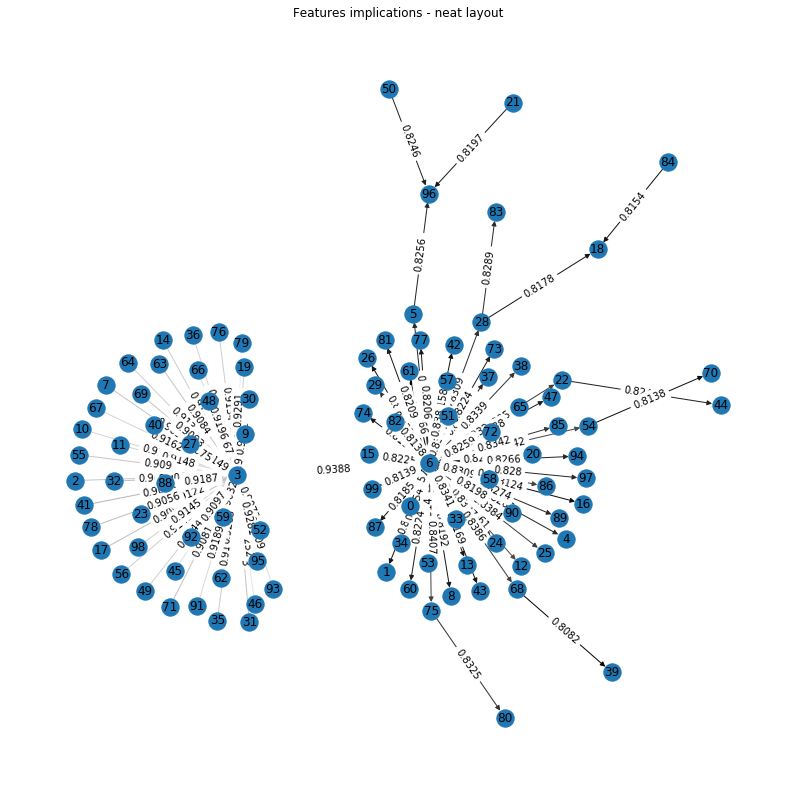

In [339]:
plt.title('Features implications - neat layout')

pos = graphviz_layout(G, prog='neato')

nx.draw(G, pos, edge_color = [ i[2]['weight'] for i in G.edges(data=True) ], edge_cmap=plt.cm.gray, 
        arrows=True, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5)

pos = nx.get_node_attributes(G,'pos')

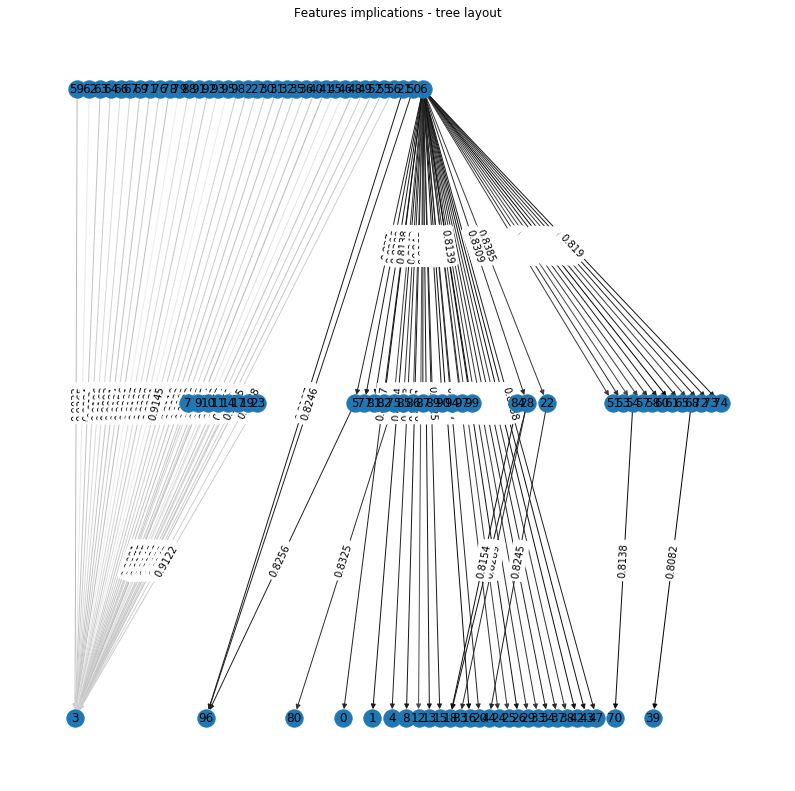

In [340]:
plt.title('Features implications - tree layout')

pos = graphviz_layout(G, prog='dot')

nx.draw(G, pos, edge_color = [ i[2]['weight'] for i in G.edges(data=True) ], edge_cmap=plt.cm.gray, 
        arrows=True, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5)

pos = nx.get_node_attributes(G,'pos')